In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y7DUWfkD8Nb3ZRS6N138")
project = rf.workspace("yomna-hupf9").project("tooth_carries_2")
dataset = project.version(2).download("yolov8")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 871.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninst

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to tooth_carries_2-2 in yolov8:: 100%|██████████| 7896/7896 [00:01<00:00, 5616.13it/s]


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 160MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/tooth_carries_2-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


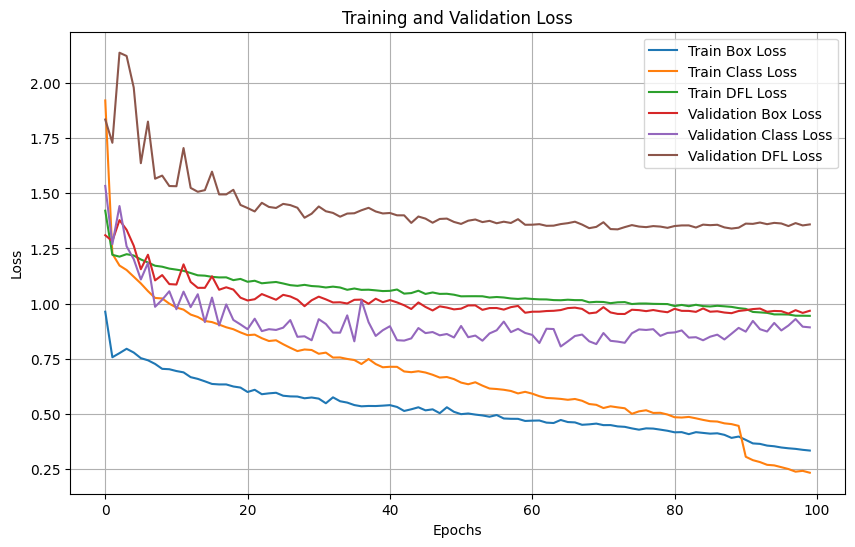

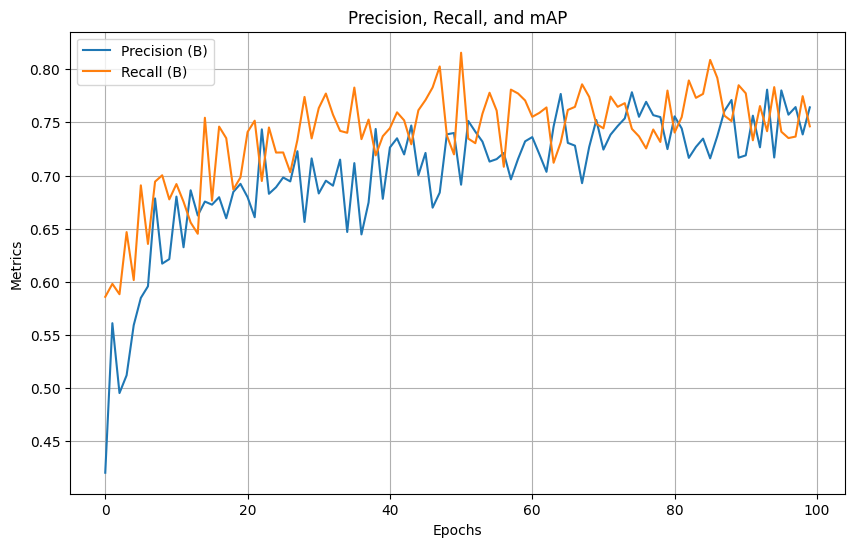

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/train/results.csv')
print(data.columns)
data.rename(columns=lambda x: x.strip(), inplace=True)
# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['train/box_loss']
train_cls_loss = data['train/cls_loss']
train_dfl_loss = data['train/dfl_loss']
precision_B = data['metrics/precision(B)']
recall_B = data['metrics/recall(B)']
# mAP50_B = data['metrics/mAP50(B)']
# mAP50_95_B = data['metrics/mAP50-95(B)']
val_box_loss = data['val/box_loss']
val_cls_loss = data['val/cls_loss']
val_dfl_loss = data['val/dfl_loss']

# Plotting the curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_box_loss, label='Train Box Loss')
plt.plot(epochs, train_cls_loss, label='Train Class Loss')
plt.plot(epochs, train_dfl_loss, label='Train DFL Loss')
plt.plot(epochs, val_box_loss, label='Validation Box Loss')
plt.plot(epochs, val_cls_loss, label='Validation Class Loss')
plt.plot(epochs, val_dfl_loss, label='Validation DFL Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, precision_B, label='Precision (B)')
plt.plot(epochs, recall_B, label='Recall (B)')
# plt.plot(epochs, mAP50_B, label='mAP50 (B)')
# plt.plot(epochs, mAP50_95_B, label='mAP50-95 (B)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dataset.location

'/content/datasets/tooth_carries_2-2'

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
2023-12-07 22:29:52.677192: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:29:52.677265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:29:52.677307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:29:54.217416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/154 /content/datasets/tooth_carries_2-2/test/images/0

In [ ]:
import os

# Path to the tooth_predict folder
tooth_predict_folder = '/content/runs/detect/predict'

# Create the tooth_predict folder
os.makedirs(tooth_predict_folder, exist_ok=True)


In [ ]:
import shutil

# Path to the source directory (where YOLOv8 saved the annotated images)
source_directory = '/content/runs/detect/predict'

# Move all files from source_directory to tooth_predict_folder
for filename in os.listdir(source_directory):
    source_file = os.path.join(source_directory, filename)
    destination_file = os.path.join(tooth_predict_folder, filename)
    shutil.move(source_file, destination_file)


#############"

In [ ]:
import os

# Spécifiez le chemin du dossier contenant les images
folder_path = '/content/runs/detect/predict'
os.chdir(folder_path)


In [ ]:
import shutil

# Liste des fichiers dans le dossier
file_list = os.listdir(folder_path)

# Copier chaque fichier dans votre Google Drive
for file_name in file_list:
    # Spécifiez le chemin du fichier source
    source_path = os.path.join(folder_path, file_name)

    # Spécifiez le chemin du fichier de destination dans Google Drive
    destination_path = os.path.join('/content/drive/MyDrive/tooth_result_V2', file_name)

    # Copiez le fichier
    shutil.copy(source_path, destination_path)


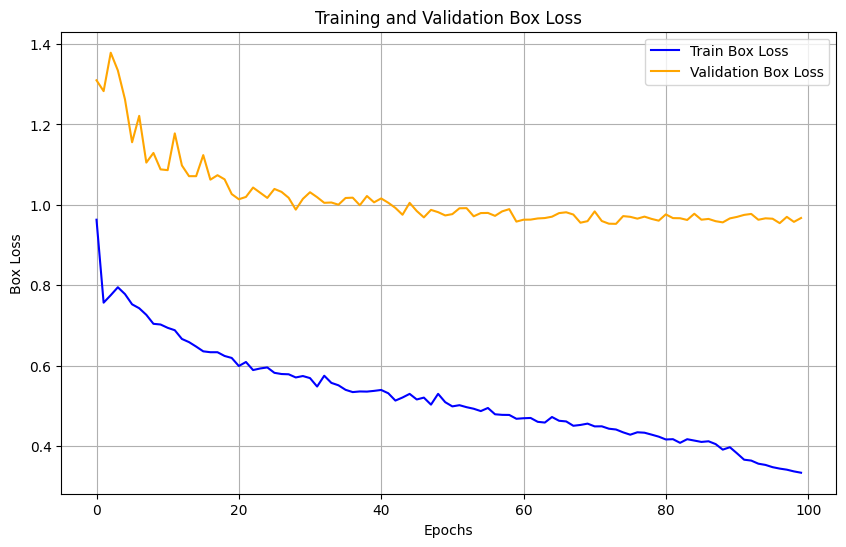

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/train/results.csv')
data.rename(columns=lambda x: x.strip(), inplace=True)

# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['train/box_loss']
val_box_loss = data['val/box_loss']

# Plotting the curves
plt.figure(figsize=(10, 6))

# Plot Train Box Loss
plt.plot(epochs, train_box_loss, label='Train Box Loss', color='blue')

# Plot Validation Box Loss
plt.plot(epochs, val_box_loss, label='Validation Box Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('Box Loss')
plt.title('Training and Validation Box Loss')
plt.legend()
plt.grid(True)
plt.show()


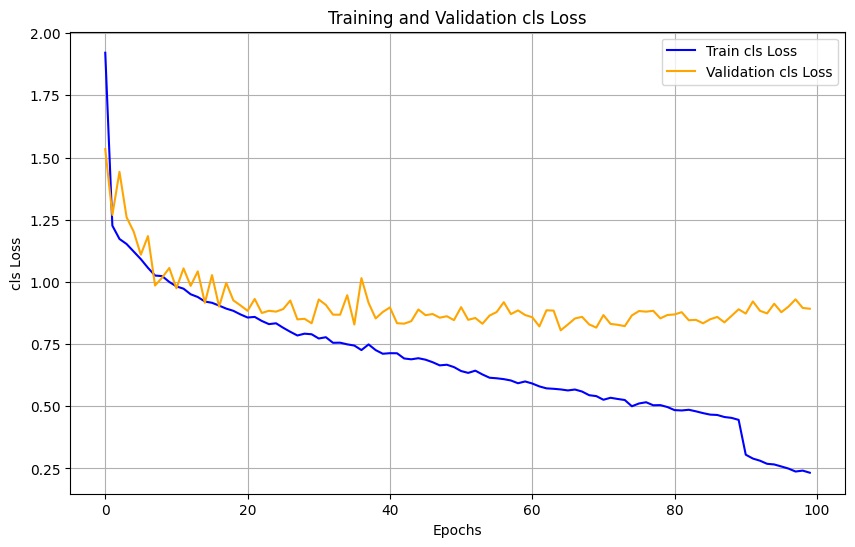

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/train/results.csv')
data.rename(columns=lambda x: x.strip(), inplace=True)

# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['train/cls_loss']
val_box_loss = data['val/cls_loss']

# Plotting the curves
plt.figure(figsize=(10, 6))

# Plot Train Box Loss
plt.plot(epochs, train_box_loss, label='Train cls Loss', color='blue')

# Plot Validation Box Loss
plt.plot(epochs, val_box_loss, label='Validation cls Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('cls Loss')
plt.title('Training and Validation cls Loss')
plt.legend()
plt.grid(True)
plt.show()


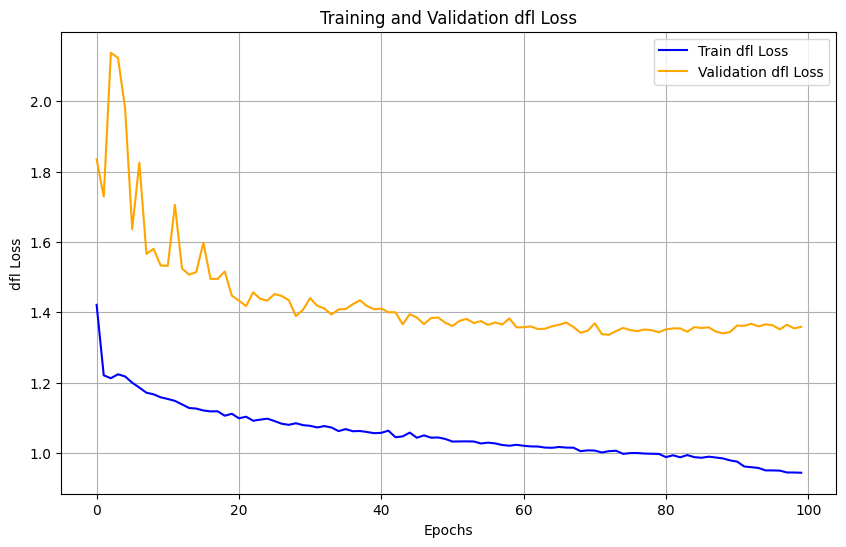

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/train/results.csv')
data.rename(columns=lambda x: x.strip(), inplace=True)

# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['train/dfl_loss']
val_box_loss = data['val/dfl_loss']

# Plotting the curves
plt.figure(figsize=(10, 6))

# Plot Train Box Loss
plt.plot(epochs, train_box_loss, label='Train dfl Loss', color='blue')

# Plot Validation Box Loss
plt.plot(epochs, val_box_loss, label='Validation dfl Loss', color='orange')

plt.xlabel('Epochs')
plt.ylabel('dfl Loss')
plt.title('Training and Validation dfl Loss')
plt.legend()
plt.grid(True)
plt.show()


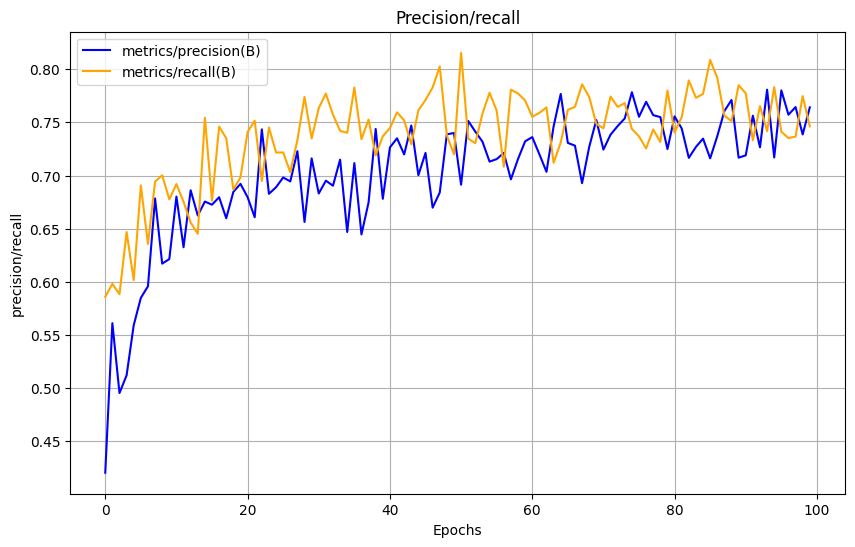

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv('/content/runs/detect/train/results.csv')
data.rename(columns=lambda x: x.strip(), inplace=True)

# Extract relevant columns
epochs = data['epoch']
train_box_loss = data['metrics/precision(B)']
val_box_loss = data['metrics/recall(B)']

# Plotting the curves
plt.figure(figsize=(10, 6))

# Plot Train Box Loss
plt.plot(epochs, train_box_loss, label='metrics/precision(B)', color='blue')

# Plot Validation Box Loss
plt.plot(epochs, val_box_loss, label='metrics/recall(B)', color='orange')

plt.xlabel('Epochs')
plt.ylabel('precision/recall')
plt.title('Precision/recall')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Les-causes-et-les-facteurs-de-risques-de-la-carie-dentaire.jpg save=True


/content
2023-12-07 22:49:07.766877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:49:07.766935: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:49:07.766971: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:49:08.832982: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/Les-causes-et-les-facteurs-de-risques-de-l

In [ ]:
import cv2
predicted_image = cv2.imread("/content/runs/detect/predict2/Les-causes-et-les-facteurs-de-risques-de-la-carie-dentaire.jpg")

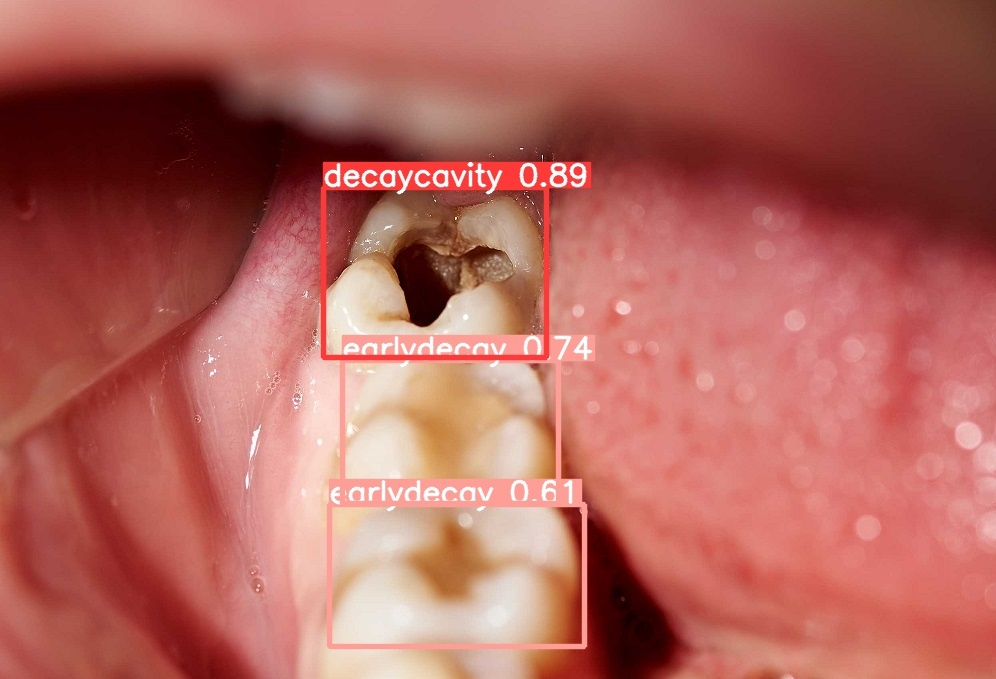

In [ ]:
display(Image(data=cv2.imencode('.jpg', predicted_image)[1]))

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/télécharger.jpg save=True


/content
2023-12-07 22:52:41.856512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 22:52:41.856577: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 22:52:41.856613: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 22:52:43.082585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/télécharger.jpg: 448x640 4 decaycavitys, 1

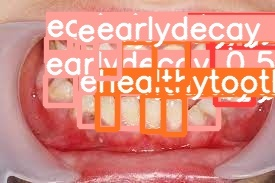

In [ ]:
import cv2
predicted_image = cv2.imread("/content/runs/detect/predict3/télécharger.jpg")
display(Image(data=cv2.imencode('.jpg', predicted_image)[1]))